## EDA for Apple Images

#### Folder structure:

apple - Ashwitha

--healthy

--rust

--scab

--EDA_apple.ipynb

--imgfile_rename.ipynb

### Importing necessary libraries

In [1]:
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import random
import cv2

Initializing folder paths for access & printing the number of images in each folder

In [2]:
healthy = "healthy/"
rust = "rust/"
scab = "scab/" 
print("Healthy folder: " + str(len(os.listdir(healthy))))
print("Rust folder: " + str(len(os.listdir(rust))))
print("Scab folder: " + str(len(os.listdir(scab))))

Healthy folder: 516
Rust folder: 622
Scab folder: 592


In [3]:
# Initialize list for the folders
folders = ["healthy", "scab", "rust"]

#### Plotting the ditribution of the Apple Images

There are three types of Apple Images - Healthy, Rust, Scab (all leaves)

In [4]:
number_folders = {'Healthy': len(os.listdir(healthy)),
'rust': len(os.listdir(rust)),
'scab': len(os.listdir(scab))}

Text(0, 0.5, '# Images')

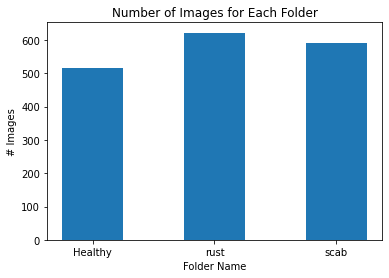

In [5]:
plt.bar(number_folders.keys(), number_folders.values(), width = .5)
plt.title("Number of Images for Each Folder")
plt.xlabel('Folder Name')
plt.ylabel('# Images')

**We can observe an inbalanced distribution of classes, with "rust" class having the most number of images, and "healthy" the least.**

#### Plotting the image sizes for each of the folders

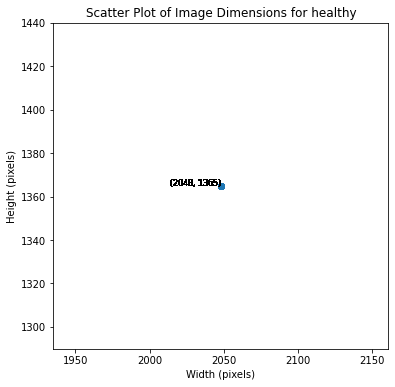

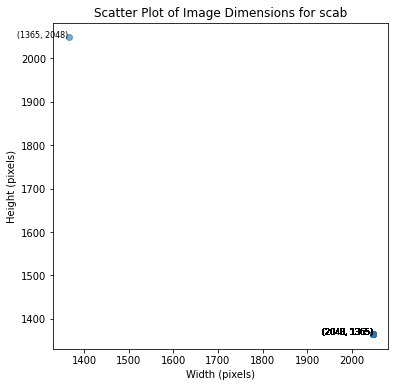

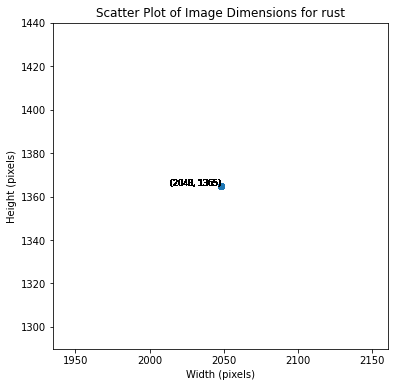

In [6]:
# Traverse the directory and collect image dimensions
for folder in folders:
    widths = []
    heights = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
        # Construct full file path
            file_path = os.path.join(folder, filename)
        
        # Open the image file
            with Image.open(file_path) as img:
            # Get width and height
                width, height = img.size
            
            # Append to lists
                widths.append(width)
                heights.append(height)

# Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(widths, heights, alpha=0.6)

# Label the axes
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')

# Title of the plot
    plt.title('Scatter Plot of Image Dimensions for '+ str(folder))

# Text labels for scatterplot points
    [plt.text(i, j, f'({i}, {j})', fontsize=8, ha='right') for (i, j) in zip(widths, heights)]
        

# Display the plot
    plt.show()

* All images of "healthy" and "scab" have the same image dimensions (2048, 1365). 
* But, "rust" has two types of image dimensions - (2048, 1365), (1365, 2048)

#### Visual Inspection of Random Samples for the three folders

Random Visual Inspection for: healthy


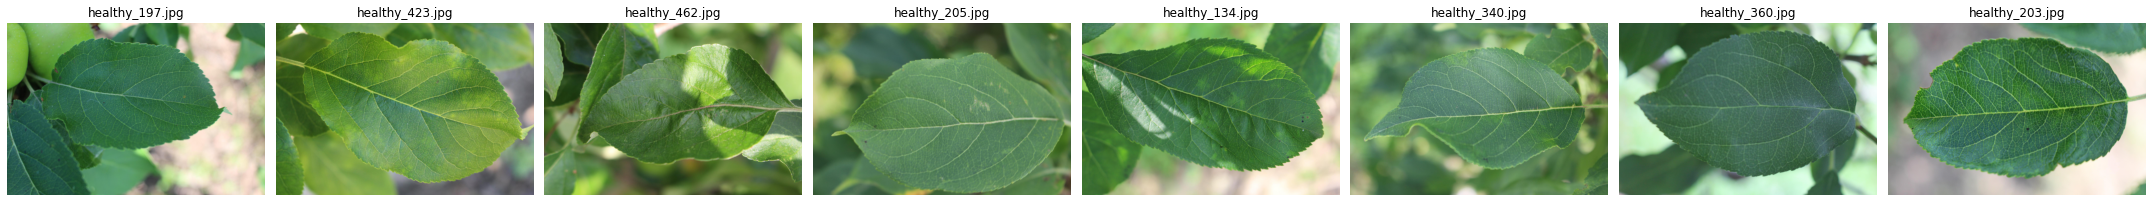

Random Visual Inspection for: scab


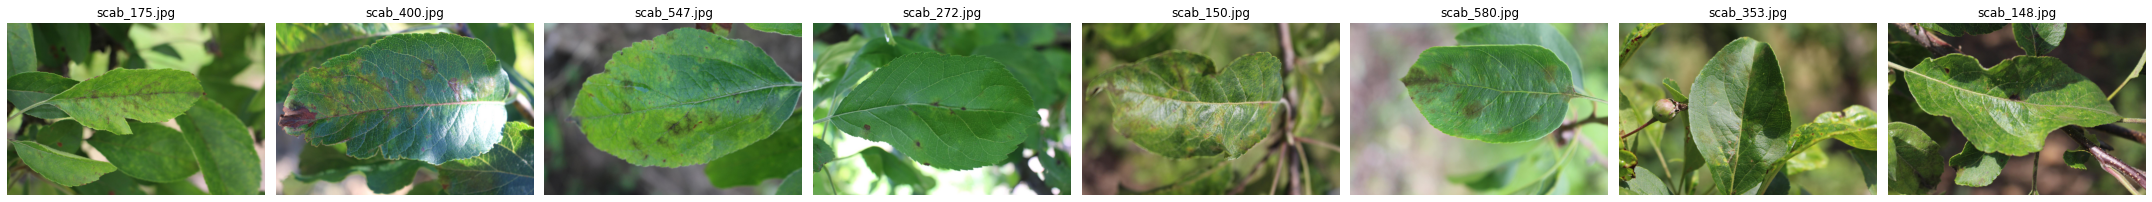

Random Visual Inspection for: rust


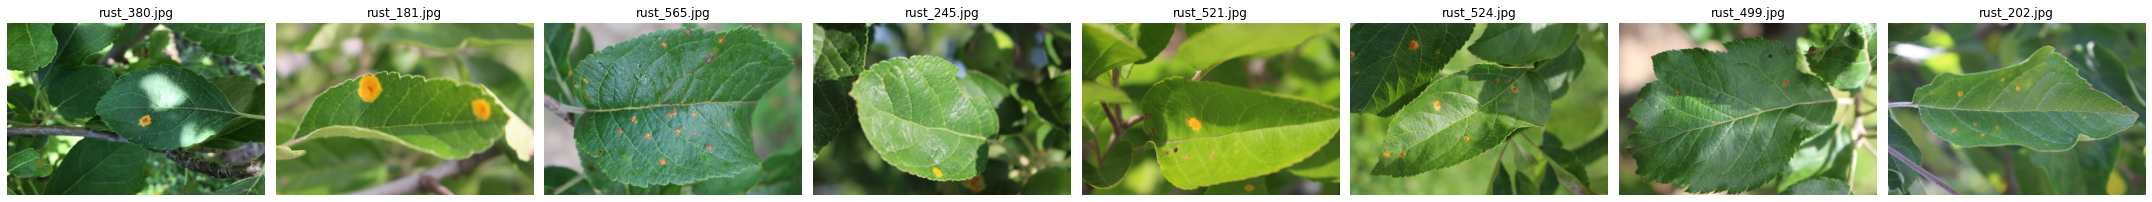

In [7]:
for folder in folders:
    num_samples = 8  # Number of random samples to display
    print("Random Visual Inspection for: " + str(folder))
# Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'))]

# Select random samples
    random_samples = random.sample(image_files, min(len(image_files), num_samples))

# Create a figure to display the images
    plt.figure(figsize=(30, 20))

# Loop through the random samples and display each image
    for i, filename in enumerate(random_samples):
    # Construct full file path
        file_path = os.path.join(folder, filename)
    
    # Open the image file
        img = Image.open(file_path)
    
    # Add a subplot for each image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(filename)  # Show the filename as the title

# Adjust layout to prevent overlap
    plt.tight_layout()

# Display the plot
    plt.show()


#### Visualizing the RGB Distribution for the Apple Images

#### What is a RGB Histogram?

An RGB histogram is a graphical representation of the distribution of pixel values in each color channel (Red, Green, and Blue) of an image. The x-axis represents the pixel intensity values (ranging from 0 to 255), and the y-axis represents the frequency of these pixel values.

There are a couple of ascpects for RGB Distribution analysis- 

**Overall Shape**
* **Peaks and Valleys** : Peaks in the histogram indicate a high frequency of specific pixel values, while valleys indicate low frequency. A peak at the higher end (near 255) suggests brighter regions, while a peak at the lower end (near 0) suggests darker regions.
* **Spread** : The spread of the histogram indicates the range of pixel values. A wide spread suggests a high contrast image with a full range of tones, while a narrow spread suggests a low contrast image.

**Color Channel Distribution**
* **Red Channel** : A histogram for the red channel shows the distribution of red pixel intensities. Peaks here indicate areas with a lot of red.
* **Green Channel** : Similarly, the green channel histogram indicates areas with a lot of green.
* **Blue Channel** : The blue channel histogram indicates areas with a lot of blue.

**Balance and Color Cast**
* **Balanced Image** : In a well-balanced image, the histograms for the red, green, and blue channels will overlap significantly, indicating a balanced color distribution.
* **Color Cast** : If one histogram is significantly higher than the others, the image may have a color cast. For example, if the red histogram is higher overall, the image may appear red-tinted.

**Brightness and Contrast**
* **Brightness** : The position of the peaks can indicate brightness. Peaks towards the right side of the histogram indicate brighter images, while peaks towards the left indicate darker images.
* **Contrast** : A histogram with a wide spread across the x-axis indicates high contrast, with both dark and bright regions. A narrow spread indicates low contrast.

In [8]:
# Function to extract RGB values from an image using OpenCV
def extract_rgb_values(image_path):
    img = cv2.imread(image_path)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Function to update histograms with RGB values
def update_histograms(image_path, red_hist, green_hist, blue_hist):
    img = extract_rgb_values(image_path)
    red_hist += cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    green_hist += cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
    blue_hist += cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()
    return red_hist, green_hist, blue_hist

RGB Histograms for healthy :


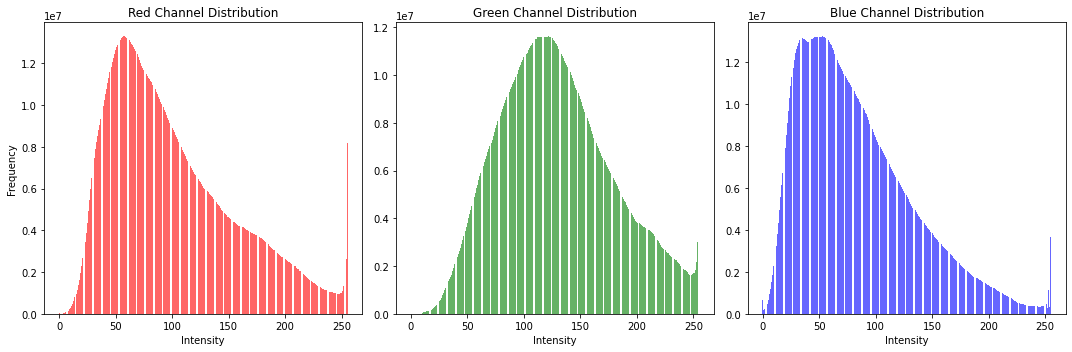

RGB Histograms for scab :


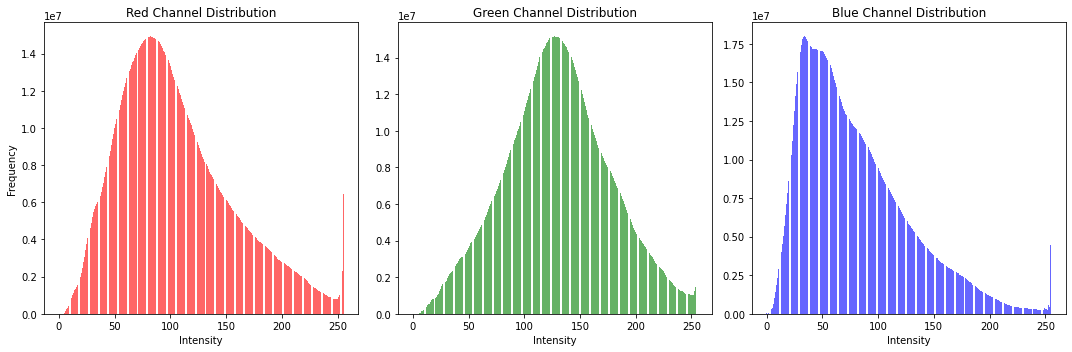

RGB Histograms for rust :


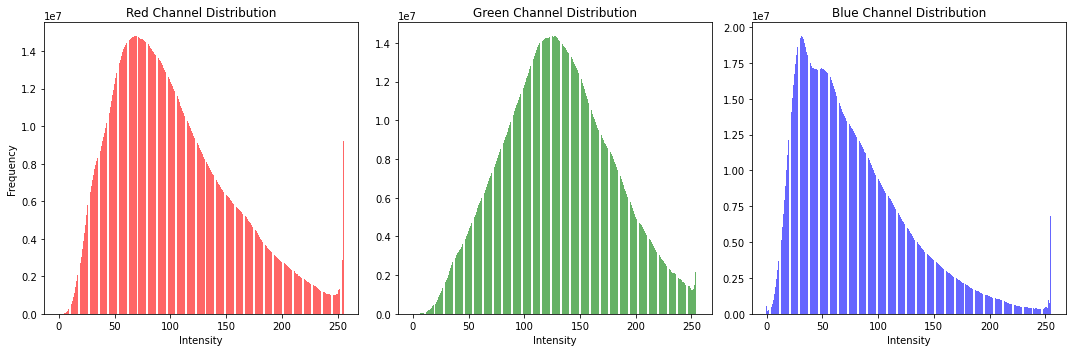

In [9]:
# Traversing each folder in the folder list
for folder_path in folders:
    # Initialize histograms for RGB values
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)

    # Traverse the directory and process images
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            # Construct full file path
            file_path = os.path.join(folder_path, filename)
            # Update histograms
            red_hist, green_hist, blue_hist = update_histograms(file_path, red_hist, green_hist, blue_hist)

    
    print("RGB Histograms for "+ str(folder_path)+ " :")
    # Plot the RGB histograms
    plt.figure(figsize=(15, 5))

    # Plot Red values
    plt.subplot(1, 3, 1)
    plt.bar(range(256), red_hist, color='red', alpha=0.6)
    plt.title('Red Channel Distribution')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    # Plot Green values
    plt.subplot(1, 3, 2)
    plt.bar(range(256), green_hist, color='green', alpha=0.6)
    plt.title('Green Channel Distribution')
    plt.xlabel('Intensity')

    # Plot Blue values
    plt.subplot(1, 3, 3)
    plt.bar(range(256), blue_hist, color='blue', alpha=0.6)
    plt.title('Blue Channel Distribution')
    plt.xlabel('Intensity')

    # Adjust layout and display the plot
    plt.tight_layout()  
    plt.show()


#### Insights:
* There are a range of green tones, which is common for vegetation images.
* The images are well-balanced, their intensities overlap significantly.
* The "rust" and "scab" may have a slight color cast, specifically blue, as the histogram frequency is slightly higher than green and red.
* There is a predominance of dark pixels in both the red and blue channels for all three classes (histograms leaning towards the left), **indiciating low brightness in the images**.
* The images have a low contrast (spread concentrated on the left or right). Might hinder identifying defining characteristics of the classes.  

#### Checking the Blurriness of the Images

Blurriness in images is measuerd using the **Laplacian variance**. The Laplacian measures the rate at which the gradient (first derivative) of the image intensity changes, effectively highlighting edges and fine details.

##### What is the Laplacian Variance?
The variance of the Laplacian refers to the statistical measure of the distribution of Laplacian values in the image. It quantifies the spread or dispersion of the Laplacian values, providing a numerical indication of the amount of detail present in the image.

**Why is Laplacian Variance Used to Detect Blurriness?**
* **Edge Sensitivity**: Since the Laplacian operator emphasizes edges, a sharp image with clear edges will have high variance in its Laplacian values. Conversely, a blurry image with fewer distinct edges will have low variance.
* **Quantitative Measure**: The variance of the Laplacian provides a single scalar value that can be used to quantify blurriness. A higher variance indicates a sharper image, while a lower variance indicates a blurrier image.
* **Simplicity and Efficiency**: Calculating the Laplacian and its variance is computationally efficient and straightforward, making it suitable for real-time applications.

In [10]:
# Function to detect blurriness using the variance of the Laplacian
def detect_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var

PLotting the blurriness values for: healthy


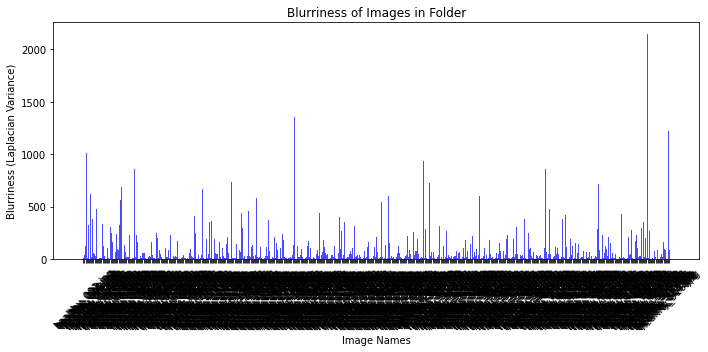

PLotting the blurriness values for: scab


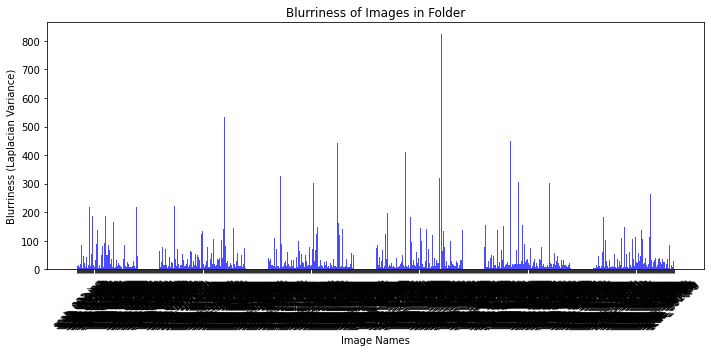

PLotting the blurriness values for: rust


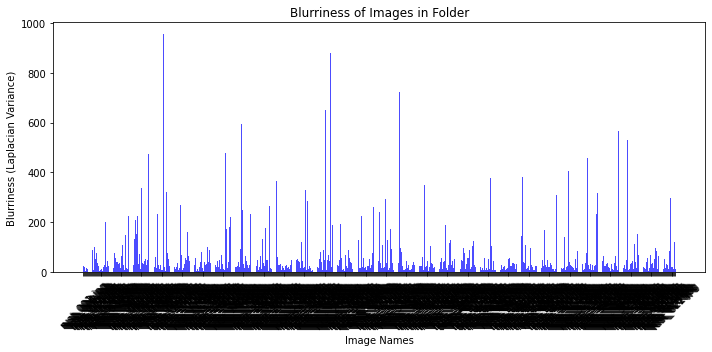

In [11]:
# Define the path to your images folder
for folder_path in folders:
    # Lists to store image names and their corresponding blurriness values
    image_names = []
    blurriness_values = []

    # Traverse the directory and process images
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            # Construct full file path
            file_path = os.path.join(folder_path, filename)
            # Detect blurriness
            blurriness = detect_blurriness(file_path)
            # Store image name and blurriness value
            image_names.append(filename)
            blurriness_values.append(blurriness)

    print("PLotting the blurriness values for: "+ str(folder_path))
    # Plot the blurriness values
    plt.figure(figsize=(10, 5))
    plt.bar(image_names, blurriness_values, color='blue', alpha=0.7)
    plt.xlabel('Image Names')
    plt.ylabel('Blurriness (Laplacian Variance)')
    plt.title('Blurriness of Images in Folder')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

    # Printing the blurriness values for easier read
    # Will later modify this function to print blur value above a certain threshold to detect blurry images
    #for im_name, blur_value in zip(image_names, blurriness_values):
    #    print("Image name: " + str(im_name) + " ; Blurriness value: " + str(blur_value))


#### Identifying outlier images using Blurriness as a measure

In [18]:
def calculate_laplacian_variance(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    variance = laplacian.var()
    return variance

def identify_outliers(blurriness_scores, threshold=2.0):
    mean = np.mean(blurriness_scores)
    std_dev = np.std(blurriness_scores)
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    outliers = [(i, score) for i, score in enumerate(blurriness_scores) if score < lower_bound or score > upper_bound]
    return outliers

def analyze_blurriness(folder_path, threshold=2.0):
    image_names = []
    blurriness_scores = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            file_path = os.path.join(folder_path, filename)
            variance = calculate_laplacian_variance(file_path)
            image_names.append(filename)
            blurriness_scores.append(variance)

    print("Maximum Blurriness Score: " + str(max(blurriness_scores)))
    print("Minimum Blurriness Score: " + str(min(blurriness_scores)))
    outliers = identify_outliers(blurriness_scores, threshold)

    return outliers, image_names, blurriness_scores


In [19]:
# Define the path to your images folder
for folder_path in folders:
    print("For: " + str(folder_path) + "\n")
    # Analyze blurriness and identify outliers
    outliers, image_names, blurriness_scores = analyze_blurriness(folder_path)

    # Print outliers
    print("*"*45)
    print("Outliers for: " + str(folder_path))
    print("*"*45 + "\n")
    for idx, score in outliers:
        print(f"{image_names[idx]}: {score}")

For: healthy

Maximum Blurriness Score: 2148.2953131746935
Minimum Blurriness Score: 2.4523436374150163
*********************************************
Outliers for: healthy
*********************************************

healthy_004.jpg: 1009.8936675467272
healthy_007.jpg: 617.1998335515206
healthy_034.jpg: 563.7282655324091
healthy_035.jpg: 687.6558486278689
healthy_046.jpg: 862.358078223748
healthy_101.jpg: 1943.6387663794244
healthy_106.jpg: 668.1858448300286
healthy_108.jpg: 1234.18016144279
healthy_131.jpg: 735.7792123826179
healthy_153.jpg: 580.9806134066124
healthy_166.jpg: 716.6902749206339
healthy_187.jpg: 1357.4143478434275
healthy_263.jpg: 547.7626707704671
healthy_269.jpg: 599.0033990657375
healthy_300.jpg: 934.1408255003583
healthy_305.jpg: 726.4421945919911
healthy_349.jpg: 600.5607292947858
healthy_407.jpg: 854.4077541413992
healthy_454.jpg: 717.2762482615019
healthy_497.jpg: 2148.2953131746935
healthy_515.jpg: 1224.726998573403
For: scab

Maximum Blurriness Score: 823.064

#### Total Energy of Images

The total energy value indicates the overall intensity or brightness of the image. A higher total energy value suggests a brighter or more intense image, while a lower value suggests a darker or less intense image.

In [23]:
def calculate_total_energy(image_path):
    """
    Calculate the total energy of an image.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    total_energy = np.sum(np.square(image.astype(np.float32)))
    return total_energy

def measure_energy_in_folder(folder_path):
    """
    Measure the total energy of images in a folder.
    """
    energy_measurements = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            file_path = os.path.join(folder_path, filename)
            total_energy = calculate_total_energy(file_path)
            energy_measurements.append((filename, total_energy))
            # print(f"Total energy of {filename}: {total_energy}")

    return energy_measurements

def plot_energy_measurements(energy_measurements):
    """
    Plot the total energy of images.
    """
    filenames, energy_values = zip(*energy_measurements)
    plt.figure(figsize=(10, 5))
    plt.barh(filenames, energy_values)
    plt.xlabel('Total Energy')
    plt.ylabel('Image')
    plt.title('Total Energy of Images')
    plt.show()

Total Energy Measurement for: healthy



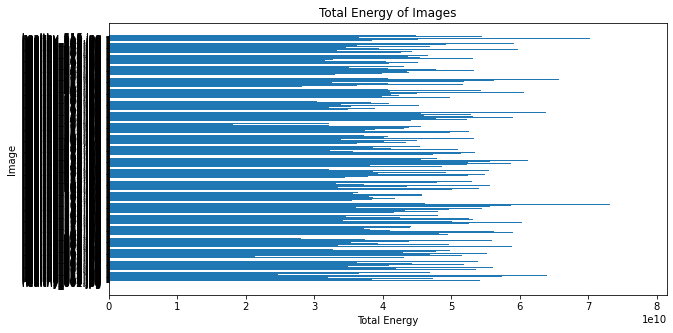

Total Energy Measurement for: scab



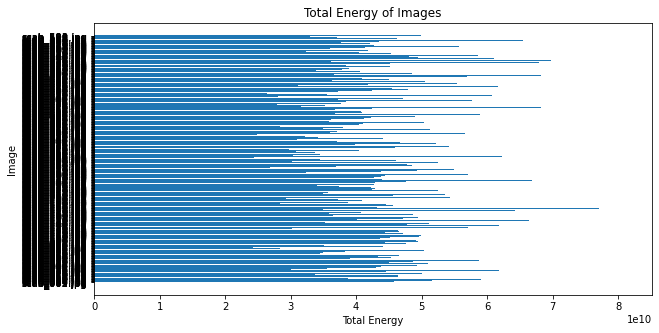

Total Energy Measurement for: rust



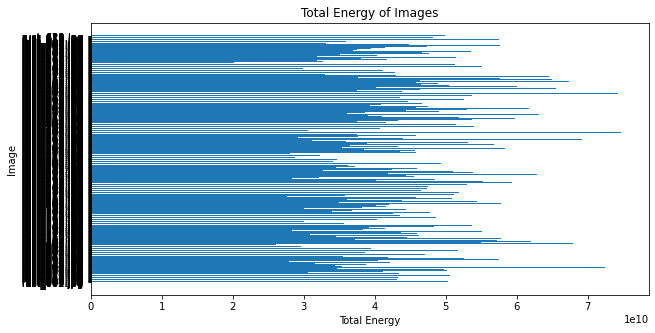

In [24]:
# Define the path to the folder containing images
for folder_path in folders:
    print("Total Energy Measurement for: " + str(folder_path) + "\n")
    # Measure the total energy of images in the folder
    energy_measurements = measure_energy_in_folder(folder_path)

    # Plot the total energy of images
    plot_energy_measurements(energy_measurements)